In [1]:
import warnings
warnings.filterwarnings('ignore')

## Part 1:  Dataset Overview

In [2]:
!pip install arabic_reshaper
!pip install python-bidi

##### B. Importing necessary libraries


In [3]:
# data wrangling
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# handling Arabic text rendering
import arabic_reshaper
from bidi.algorithm import get_display

##### C. Loading and displaying the dataset


In [4]:
file_path = '/content/940-complaints-2022 (1).pq'

df = pd.read_parquet(file_path)


In [5]:
df.sample(5)

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
220686,أمانة محافظة جدة,أمانة محافظة جدة,النظافة العامة,تجمع مياه او مستنقعات,مسدد,غير مقيم,11-24-22,11/30/2022
1029407,أمانة منطقة الرياض,أمانة منطقة الرياض,أعمدة الإنارة,صيانة تمديدات انارة,مسدد,غير مقيم,05-27-22,09/07/2022
202848,أمانة الطائف,أمانة محافظة الطائف,الطرق,المطبات العشوائية,مسدد,غير راضي,11-19-22,11/21/2022
857504,أمانة القصيم,البدائع,حفر الشوارع,هبوط مسار حفرية خدمات,مسدد,غير مقيم,04-16-22,04/18/2022
604650,أمانة منطقة حائل,أمانة منطقة حائل,مخلفات الهدم والبناء,مخلفات الهدم والبناء,مسدد,غير مقيم,08-24-22,10/04/2022


### 1.3. Preliminary Inspection & Overview
<details>
    <summary><b>Hints</b></summary>
    
- Are there any columns with inappropriate data types that need conversion (e.g., dates stored as strings)?
- Are there closed complaints with missing closure dates?
- Any redundant columns?

</details>

In [6]:
# check number of entries and columns
print(f"There are {df.shape[0]} entries and {df.shape[1]} features")

There are 1533235 entries and 8 features


In [7]:
# check column present in dataset
features = df.columns
features

Index(['الأمانة', 'البلدية', 'المحاور', 'التصنيف التخصصي', 'حالات البلاغات',
       'حالة الرضا', 'تاريخ الإنشاء', 'تاريخ الإغلاق'],
      dtype='object')

In [8]:
# check feature columns data type
df.dtypes

الأمانة            object
البلدية            object
المحاور            object
التصنيف التخصصي    object
حالات البلاغات     object
حالة الرضا         object
تاريخ الإنشاء      object
تاريخ الإغلاق      object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533235 entries, 0 to 1533234
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   الأمانة          1533235 non-null  object
 1   البلدية          1533235 non-null  object
 2   المحاور          1533235 non-null  object
 3   التصنيف التخصصي  1533235 non-null  object
 4   حالات البلاغات   1533235 non-null  object
 5   حالة الرضا       1533235 non-null  object
 6   تاريخ الإنشاء    1533235 non-null  object
 7   تاريخ الإغلاق    1533235 non-null  object
dtypes: object(8)
memory usage: 93.6+ MB


In [10]:
display(df.describe()) # general statistics

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
count,1533235,1533235,1533235,1533235,1533235,1533235,1533235,1533235
unique,18,335,13,107,5,4,365,384
top,أمانة منطقة الرياض,أمانة منطقة الرياض,النظافة العامة,نفايات او مبعثرات بالشارع,مسدد,غير مقيم,08-23-22,09/07/2022
freq,367363,300141,578802,171982,1463542,1026836,7514,107074


In [11]:
display(df['تاريخ الإنشاء'].str.slice(0,4).value_counts()) # Examine timeframe for creation

display(df['تاريخ الإغلاق'].str.slice(0,4).value_counts()) # Examine timeframe for closure

08-2    61055
01-1    52064
09-1    51562
01-0    50316
08-1    49815
04-2    48554
04-1    48032
09-2    45391
10-1    42733
12-1    42020
03-2    41826
12-2    40888
09-0    40749
05-1    40260
10-2    40095
11-2    39952
02-1    39872
04-0    39305
08-0    39192
01-2    38901
11-1    38529
11-0    37377
03-1    37322
10-0    37106
06-1    37013
02-0    36634
06-2    36433
07-2    35868
12-0    35155
05-2    34995
05-0    34251
03-0    33825
07-1    33228
02-2    31972
06-0    31718
07-0    30662
08-3    10570
12-3     9991
01-3     9084
03-3     8899
10-3     8607
05-3     7524
07-3     7321
04-3     5364
11-3     4191
09-3     3872
06-3     3142
Name: تاريخ الإنشاء, dtype: int64

09/0    136264
-       101885
10/0     50326
01/1     47402
09/2     47276
10/1     46378
09/1     45606
12/1     44520
08/2     42914
01/0     41620
12/2     41149
10/2     40602
08/1     38348
11/0     36817
04/1     36803
03/2     36049
05/1     35491
04/2     35017
11/1     34747
02/1     34482
08/0     31568
01/2     31350
03/1     31106
02/0     30905
03/0     30869
06/2     30550
11/2     30512
02/2     30166
07/2     28914
05/2     28711
12/0     28608
04/0     27714
07/1     27681
06/1     26234
06/0     26121
05/0     25337
07/0     25172
08/3     10387
10/3     10376
01/3      7962
05/3      7144
03/3      6900
07/3      6084
12/3      5613
11/3      4283
04/3      4005
09/3      2869
06/3      2398
Name: تاريخ الإغلاق, dtype: int64

### 1.4. Cleaning and Preprocessing

##### A. Convert closure and creation dates to the appropriate data types

<details>
    <summary><b>Hints</b></summary>
    
- The number of null values in closure date should be equivalent to the count of `-` entries

</details>

In [12]:
df['تاريخ الإنشاء'] = pd.to_datetime(df['تاريخ الإنشاء'])
df['تاريخ الإغلاق'] = pd.to_datetime(df['تاريخ الإغلاق'].replace('-', pd.NaT))

In [13]:
df['تاريخ الإغلاق'].isnull().sum()

101885

In [14]:
1533235 - 101885

1431350

matched (tick ❤)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533235 entries, 0 to 1533234
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   الأمانة          1533235 non-null  object        
 1   البلدية          1533235 non-null  object        
 2   المحاور          1533235 non-null  object        
 3   التصنيف التخصصي  1533235 non-null  object        
 4   حالات البلاغات   1533235 non-null  object        
 5   حالة الرضا       1533235 non-null  object        
 6   تاريخ الإنشاء    1533235 non-null  datetime64[ns]
 7   تاريخ الإغلاق    1431350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 93.6+ MB


##### B. Remove closed complaints that are missing closure time


In [16]:
closed = (df['حالات البلاغات'] == 'مسدد')
missing_close_date = df['تاريخ الإغلاق'].isnull()

invalid = (closed & missing_close_date)

In [17]:
df = df[~invalid]

In [18]:
df.shape

(1497291, 8)

In [19]:
df[df.duplicated() == True]

,الأمانة,البلدية,المحاور,التصنيف التخصصي,حالات البلاغات,حالة الرضا,تاريخ الإنشاء,تاريخ الإغلاق
7,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-02
9,أمانة منطقة الرياض,أمانة منطقة الرياض,النظافة العامة,حاوية تجارية بموقع غير ملائم,مسدد,راضي,2022-10-01,2022-10-01
17,أمانة منطقة الرياض,أمانة منطقة الرياض,أعمدة الإنارة,انارة غير منتظمة او ضعيفة او مطفئة,مسدد,راضي,2022-10-01,2022-10-01
19,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-02
25,أمانة منطقة الرياض,أمانة منطقة الرياض,حفر الشوارع,صيانة اسفلت,مسدد,غير مقيم,2022-10-01,2022-10-02
...,...,...,...,...,...,...,...,...
1533223,أمانة العاصمة المقدسة,أمانة العاصمة المقدسة,أعمدة الإنارة,صيانة اعمدة انارة,مسدد,غير مقيم,2022-03-31,2022-04-03
1533224,أمانة القصيم,أمانة منطقة القصيم,النظافة العامة,تدني مستوى نظافة الأماكن العامة,مسدد,راضي,2022-03-31,2022-04-02
1533227,أمانة منطقة تبوك,أمانة منطقة تبوك,النظافة العامة,تدني مستوى نظافة الأماكن العامة,مسدد,غير مقيم,2022-03-31,2022-04-03
1533228,أمانة منطقة حائل,أمانة منطقة حائل,النظافة العامة,نفايات او مبعثرات بالشارع,مسدد,راضي,2022-03-31,2022-04-04


In [20]:
df['الأمانة'].unique()

array(['أمانة منطقة الرياض', 'أمانة المنطقة الشرقية',
       'أمانة العاصمة المقدسة', 'أمانة منطقة حائل', 'أمانة محافظة جدة',
       'أمانة القصيم', 'أمانة المدينة المنورة', 'أمانة منطقة الجوف',
       'أمانة جازان', 'أمانة منطقة عسير', 'أمانة الطائف',
       'أمانة حفرالباطن', 'أمانة محافظة الاحساء', 'أمانة منطقة تبوك',
       'أمانة منطقة نجران', 'أمانة الباحة', 'أمانة منطقة الحدود الشمالية',
       'الهيئة الملكية بالعلا'], dtype=object)

In [21]:
df['البلدية'].unique()

array(['أمانة منطقة الرياض', 'بلدية تمير', 'بلدية حوطة بني تميم',
       'بلدية الزلفي', 'بلدية الدلم', 'بلدية الخرج', 'بلدية الغاط',
       'بلدية وادي الدواسر', 'بلدية عفيف', 'بلدية الحريق',
       'بلدية العيينه و الجبيله', 'بلدية الدوادمي', 'بلدية ضرماء',
       'بلدية الدرعيه', 'بلدية رماح', 'بلدية الهياثم', 'بلدية المجمعة',
       'بلدية الحلوه', 'بلدية الجمش', 'بلدية المزاحمية', 'بلدية ساجر',
       'بلدية حريملاء', 'بلدية الافلاج', 'بلدية شقراء',
       'أمانة المنطقة الشرقية', 'أمانة العاصمة المقدسة',
       'أمانة منطقة حائل', 'أمانة محافظة جدة', 'عنيزة',
       'أمانة منطقة المدينة المنورة', 'ينبع', 'أمانة منطقة الجوف',
       'أمانة منطقة القصيم', 'أحد المسارحة', 'أمانة منطقة عسير', 'رنية',
       'امانة محافظة حفر الباطن', 'ابى عريش', 'أمانة محافظة الطائف',
       'أمانة محافظة الاحساء', 'رجال ألمع', 'أمانة منطقة جازان',
       'الشماسية', 'خميس مشيط', 'أمانة منطقة تبوك', 'شرورة', 'رابغ',
       'النماص', 'الرس', 'وادي جيزان', 'ضمد', 'محايل', 'الاسياح',
       'الدوادمى', 

In [22]:
df = df[~df.duplicated()]

In [23]:
df.shape

(857918, 8)

Resolution Time

In [24]:
# resolution time in days
df['Resolution Time (Days)'] = (df['تاريخ الإغلاق'] - df['تاريخ الإنشاء']).dt.days

In [25]:
# Overview of Complaints
total_complaints = df.shape[0]
resolved_complaints = (df[df['حالات البلاغات'] == 'مسدد']).shape[0]
satisfied_complaints = df[df['حالة الرضا'] == 'راضي'].shape[0]
average_resolution_time = df['Resolution Time (Days)'].mean()
resolved_complaints_percentage = (df[df['حالات البلاغات'] == 'مسدد'].shape[0] / total_complaints) * 100
satisfied_complaints_percentage = (df[df['حالة الرضا'] == 'راضي'].shape[0] / total_complaints) * 100
print(f"Total Complaints: {total_complaints}")
print(f"Resolved Complaints: {resolved_complaints}")
print(f"Satisfied Complaints: {satisfied_complaints}")
print(f"Resolved Complaints in percentage: {resolved_complaints_percentage}")
print(f"Satisfied Complaints in percentage:  {satisfied_complaints_percentage}")
print(f"Average Resolution Time: {average_resolution_time} days")


Total Complaints: 857918
Resolved Complaints: 834164
Satisfied Complaints: 186581
Resolved Complaints in percentage: 97.23120391459324
Satisfied Complaints in percentage:  21.74811578728969
Average Resolution Time: 17.36035443915322 days


# Complaints Distribution by Municipality

In [26]:
sns.set_palette('viridis')

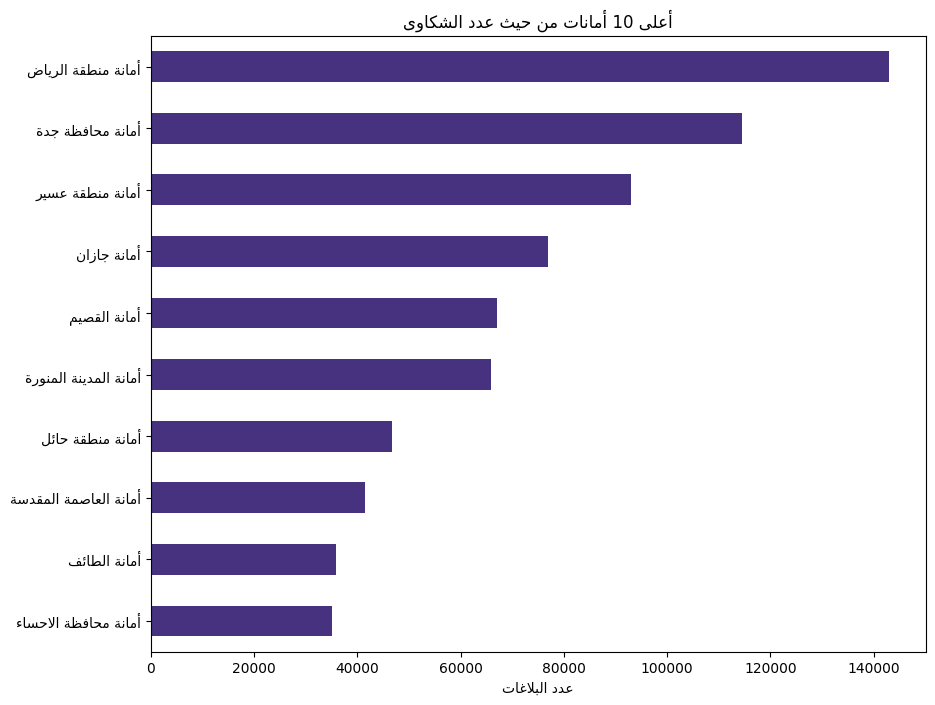

In [27]:
top_municipalities = df['الأمانة'].value_counts().head(10)
plt.figure(figsize=(10, 8))
top_municipalities.plot(kind='barh')

plt.title(get_display(arabic_reshaper.reshape('أعلى 10 أمانات من حيث عدد الشكاوى')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد البلاغات')))
y_labels = [arabic_reshaper.reshape(label) for label in top_municipalities.index.to_list()]
y_labels = [get_display(label) for label in y_labels]

plt.gca().set_yticklabels(y_labels)
plt.gca().invert_yaxis()
plt.show()


# Top specialized classifications by the number of complaints

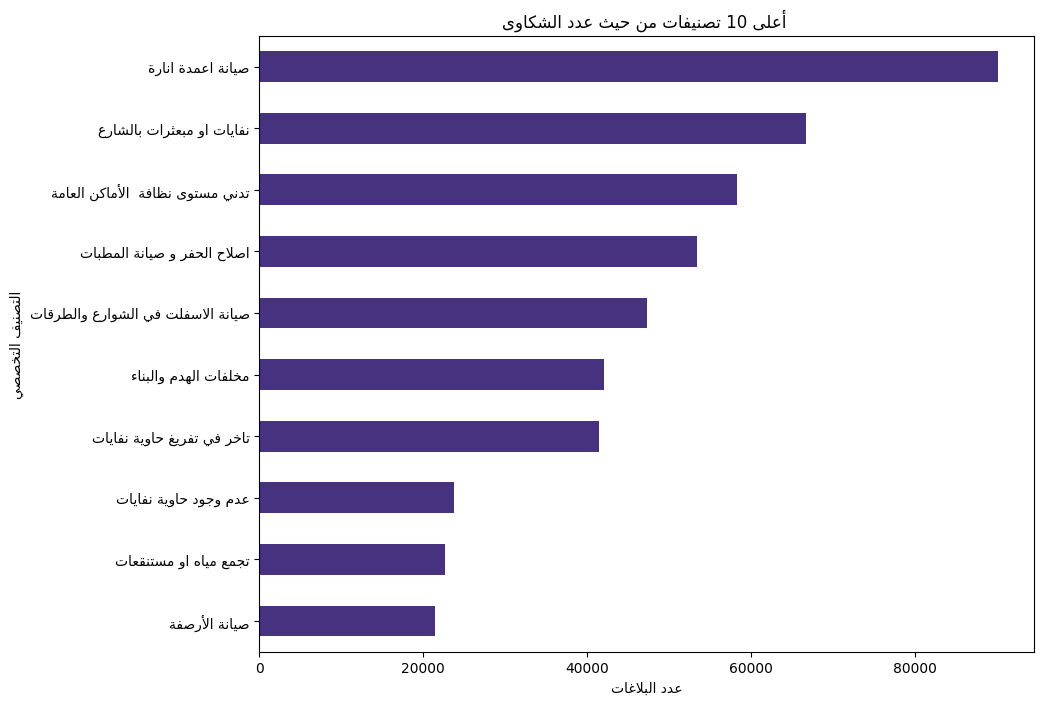

In [28]:
top_classifications = df['التصنيف التخصصي'].value_counts().head(10)
plt.figure(figsize=(10, 8))
top_classifications.plot(kind='barh')
y_labels = [arabic_reshaper.reshape(label) for label in top_classifications.index.to_list()]
y_labels = [get_display(label) for label in y_labels]


plt.title(get_display(arabic_reshaper.reshape(' أعلى 10 تصنيفات من حيث عدد الشكاوى')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد البلاغات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التصنيف التخصصي')))
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(y_labels)
plt.show()

# Average Resolution Time by Specialized Classification

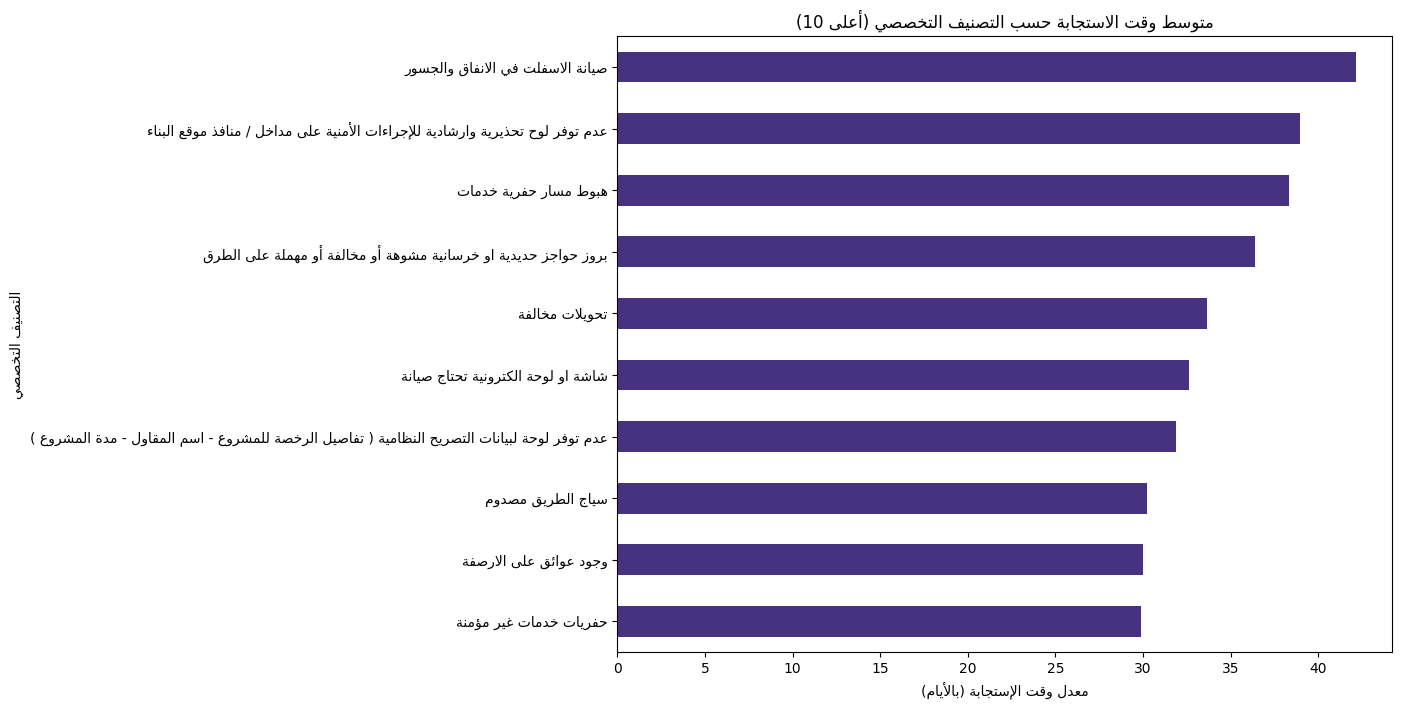

In [29]:
average_resolution_time_by_classification = df.groupby('التصنيف التخصصي')['Resolution Time (Days)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,8))
average_resolution_time_by_classification.plot(kind='barh')
y_labels = [arabic_reshaper.reshape(label) for label in average_resolution_time_by_classification.index.to_list()]
y_labels = [get_display(label) for label in y_labels]
plt.title(get_display(arabic_reshaper.reshape('متوسط وقت الاستجابة حسب التصنيف التخصصي (أعلى 10)')))
plt.xlabel(get_display(arabic_reshaper.reshape('معدل وقت الإستجابة (بالأيام)')))
plt.ylabel(get_display(arabic_reshaper.reshape('التصنيف التخصصي')))
plt.gca().invert_yaxis()
plt.gca().set_yticklabels(y_labels)
plt.show()


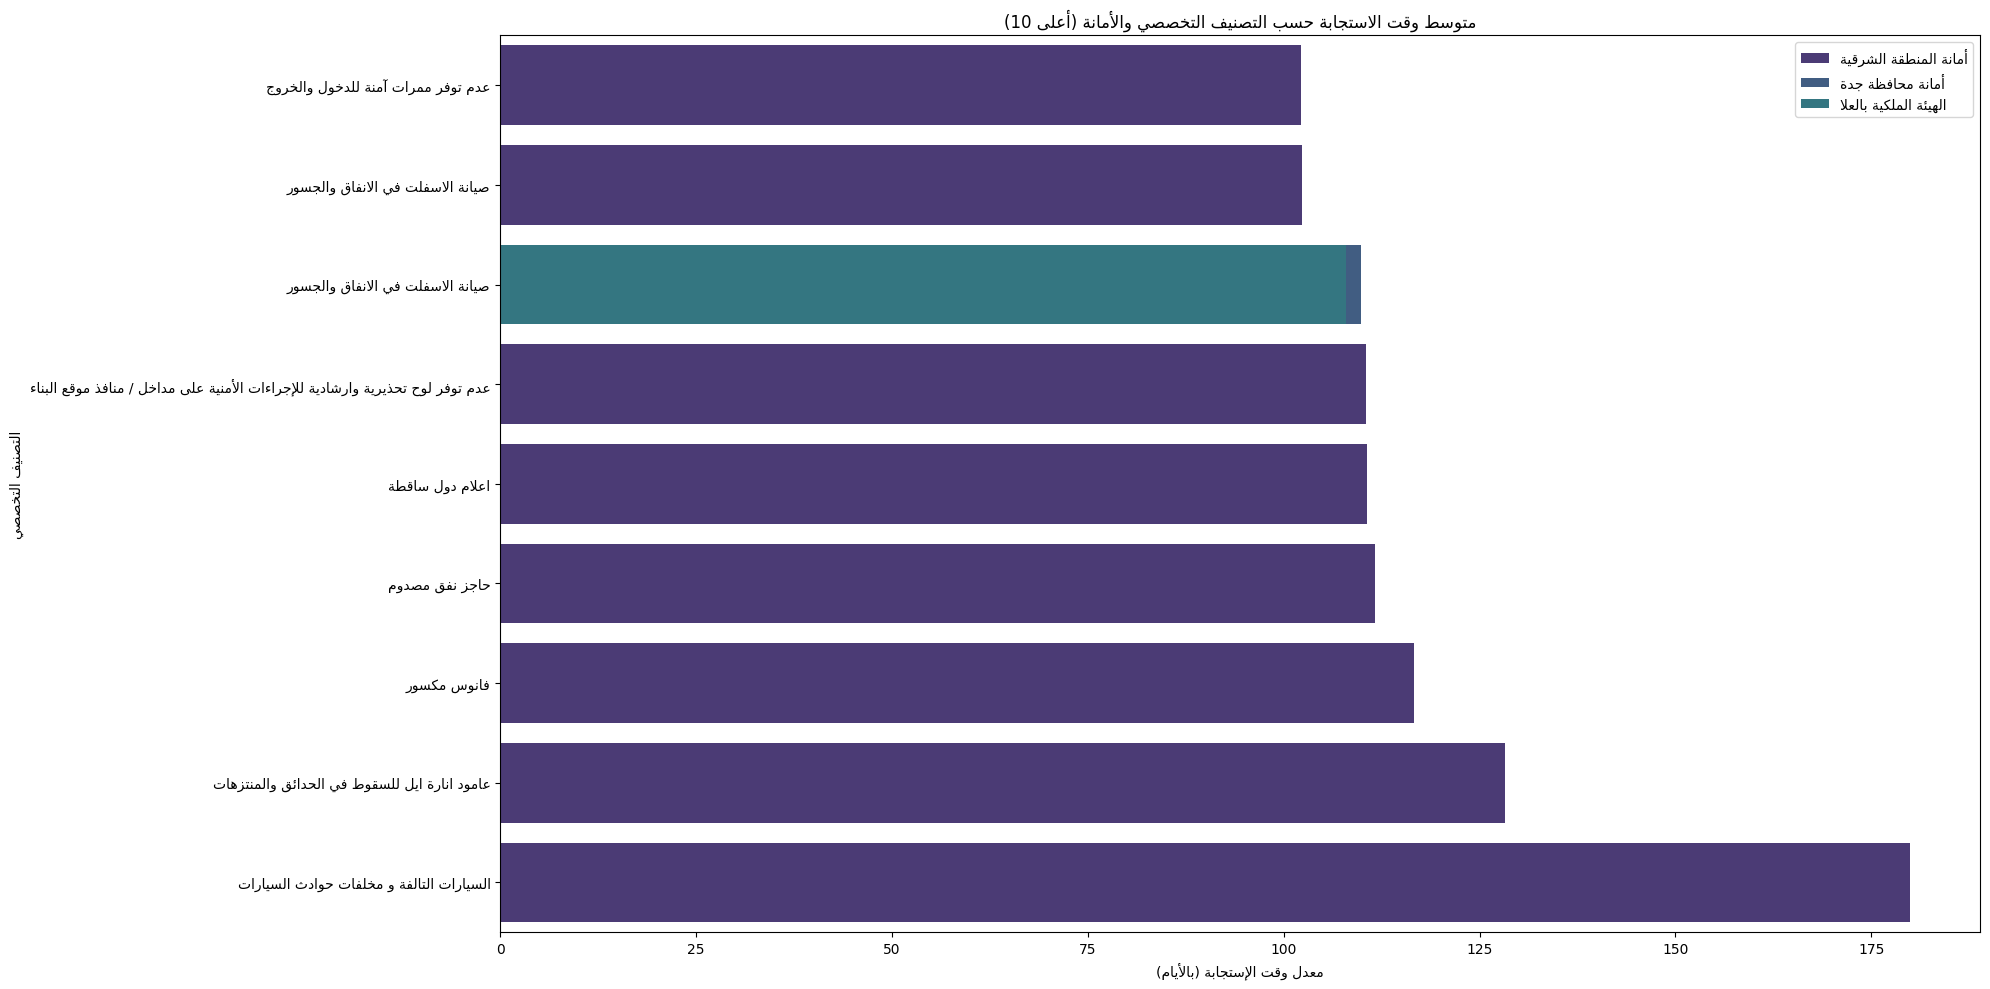

In [30]:
average_resolution_time = df.groupby(['الأمانة', 'التصنيف التخصصي'])['Resolution Time (Days)'].mean().reset_index()
top_average_resolution_time = average_resolution_time.sort_values(by='Resolution Time (Days)', ascending=False).head(10)

plt.figure(figsize=(20,10))
sns.barplot(
    data=top_average_resolution_time,
    y='التصنيف التخصصي',
    x='Resolution Time (Days)',
    hue='الأمانة',
    dodge=False
)
y_labels = [arabic_reshaper.reshape(label) for label in top_average_resolution_time['التصنيف التخصصي']]
y_labels = [get_display(label) for label in y_labels]
handles, labels = plt.gca().get_legend_handles_labels()
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]

plt.title(get_display(arabic_reshaper.reshape('متوسط وقت الاستجابة حسب التصنيف التخصصي والأمانة (أعلى 10)')))
plt.xlabel(get_display(arabic_reshaper.reshape('معدل وقت الإستجابة (بالأيام)')))
plt.ylabel(get_display(arabic_reshaper.reshape('التصنيف التخصصي')))

plt.gca().invert_yaxis()
plt.gca().set_yticklabels(y_labels)
plt.legend(handles, reshaped_labels)
plt.tight_layout()
plt.show()


# Satisfaction Analysis

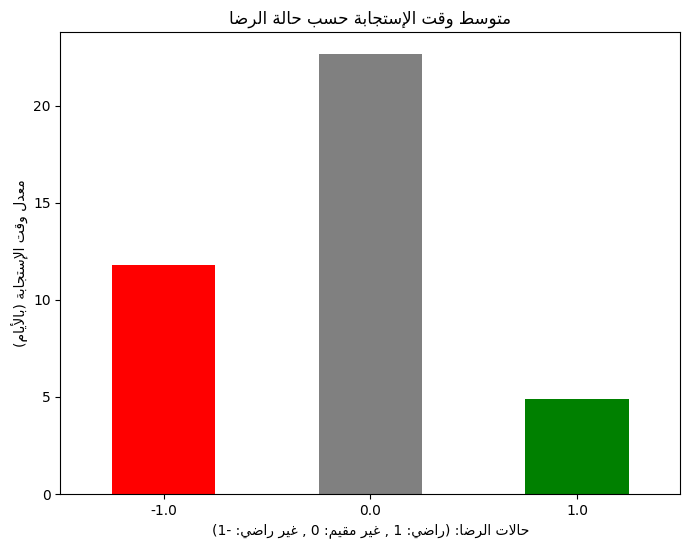

In [31]:
satisfaction_mapping = {'راضي': 1, 'غير مقيم': 0, 'غير راضي': -1}
df['Satisfaction Score'] = df['حالة الرضا'].map(satisfaction_mapping)
average_resolution_time_by_satisfaction = df.groupby('Satisfaction Score')['Resolution Time (Days)'].mean()
plt.figure(figsize=(8, 6))
average_resolution_time_by_satisfaction.plot(kind='bar', color=['red', 'grey', 'green'])
plt.title(get_display(arabic_reshaper.reshape('متوسط وقت الإستجابة حسب حالة الرضا')))
plt.xlabel(get_display(arabic_reshaper.reshape('حالات الرضا: (راضي: 1 , غير مقيِّم: 0 , غير راضي: -1)')))
plt.ylabel(get_display(arabic_reshaper.reshape('معدل وقت الإستجابة (بالأيام)')))
plt.xticks(rotation=0)
plt.show()

In [32]:
non_rated_ratio = (df['حالة الرضا'] == 'غير مقيم').sum() / df.shape[0] * 100
print(f"Percentage of non-rated complaints: {non_rated_ratio:.2f}%")


Percentage of non-rated complaints: 66.10%


<Figure size 1000x800 with 0 Axes>

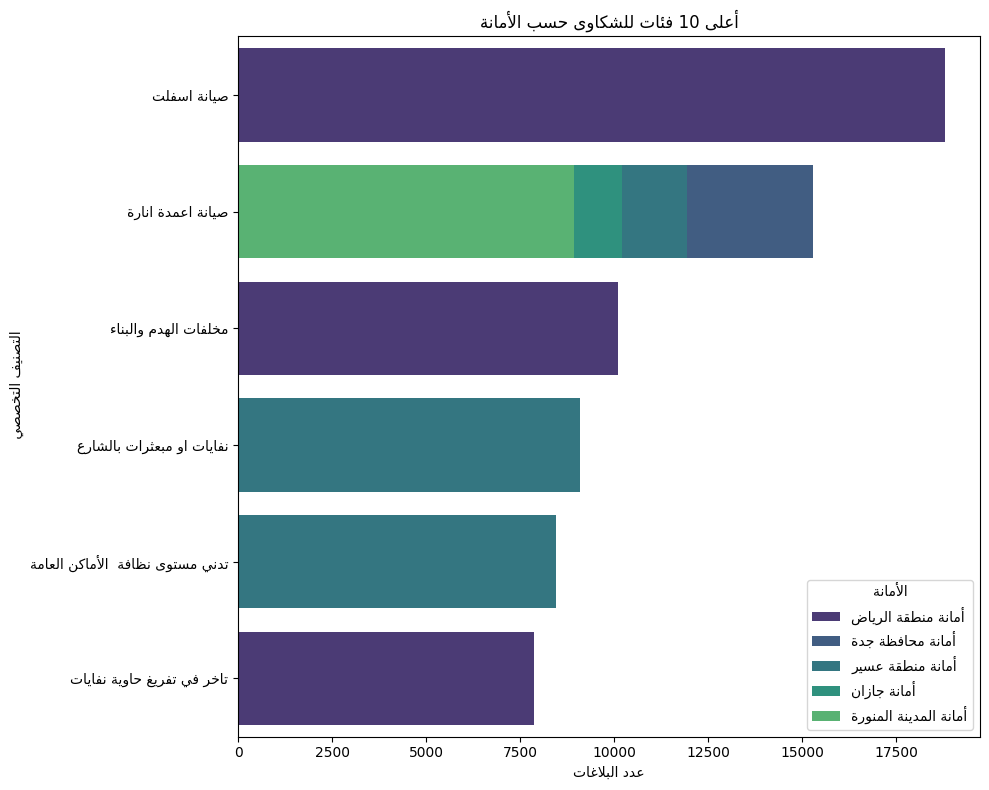

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
complaint_counts = df.groupby(['الأمانة', 'التصنيف التخصصي']).size().reset_index(name='count')
top_complaints = complaint_counts.sort_values(by='count', ascending=False).head(10)

# plot
plt.figure(figsize=(10, 8))
sns.barplot(x='count', y='التصنيف التخصصي', hue='الأمانة', data=top_complaints, dodge=False)

plt.title(get_display(arabic_reshaper.reshape('أعلى 10 فئات للشكاوى حسب الأمانة')))
plt.xlabel(get_display(arabic_reshaper.reshape('عدد البلاغات')))
plt.ylabel(get_display(arabic_reshaper.reshape('التصنيف التخصصي ')))

# y-axis tick labels
plt.gca().set_yticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in plt.gca().get_yticklabels()])

# x-axis tick labels
plt.gca().set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in plt.gca().get_xticklabels()])

# legend
handles, labels = plt.gca().get_legend_handles_labels()
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]
legend = plt.gca().legend(handles, reshaped_labels, title=get_display(arabic_reshaper.reshape('الأمانة')))

plt.tight_layout()
plt.show()
plt.close()


In [34]:
sum = 0
for municipality in df['الأمانة'].unique():
    satisfacion_level = df[(df['الأمانة'] == municipality ) & (df['حالة الرضا'] == 'راضي')].shape[0] / df[(df['الأمانة'] == municipality)].shape[0]
    sum += satisfacion_level
    print(f"The satisfaction level in {municipality} is: {satisfacion_level:8.6f}")
    print(f"the number of complaints in {municipality} is {df[(df['الأمانة'] == municipality)].shape[0]}")
print(f"The average satisfaction level is: {sum/len(df['الأمانة'].unique()):8.6f}")

The satisfaction level in أمانة منطقة الرياض is: 0.251851
the number of complaints in أمانة منطقة الرياض is 142918
The satisfaction level in أمانة المنطقة الشرقية is: 0.000000
the number of complaints in أمانة المنطقة الشرقية is 29518
The satisfaction level in أمانة العاصمة المقدسة is: 0.177600
the number of complaints in أمانة العاصمة المقدسة is 41464
The satisfaction level in أمانة منطقة حائل is: 0.312805
the number of complaints in أمانة منطقة حائل is 46796
The satisfaction level in أمانة محافظة جدة is: 0.118988
the number of complaints in أمانة محافظة جدة is 114482
The satisfaction level in أمانة القصيم is: 0.280485
the number of complaints in أمانة القصيم is 66959
The satisfaction level in أمانة المدينة المنورة is: 0.191450
the number of complaints in أمانة المدينة المنورة is 65897
The satisfaction level in أمانة منطقة الجوف is: 0.247294
the number of complaints in أمانة منطقة الجوف is 21715
The satisfaction level in أمانة جازان is: 0.258317
the number of complaints in أمانة جازان

##### C. Drop redundant columns

In [135]:
#df = df.drop('الأمانة', axis=1)

In [136]:
#df.sample(5)

In [35]:
df.to_parquet('/content/940-complaints-2022.pq')

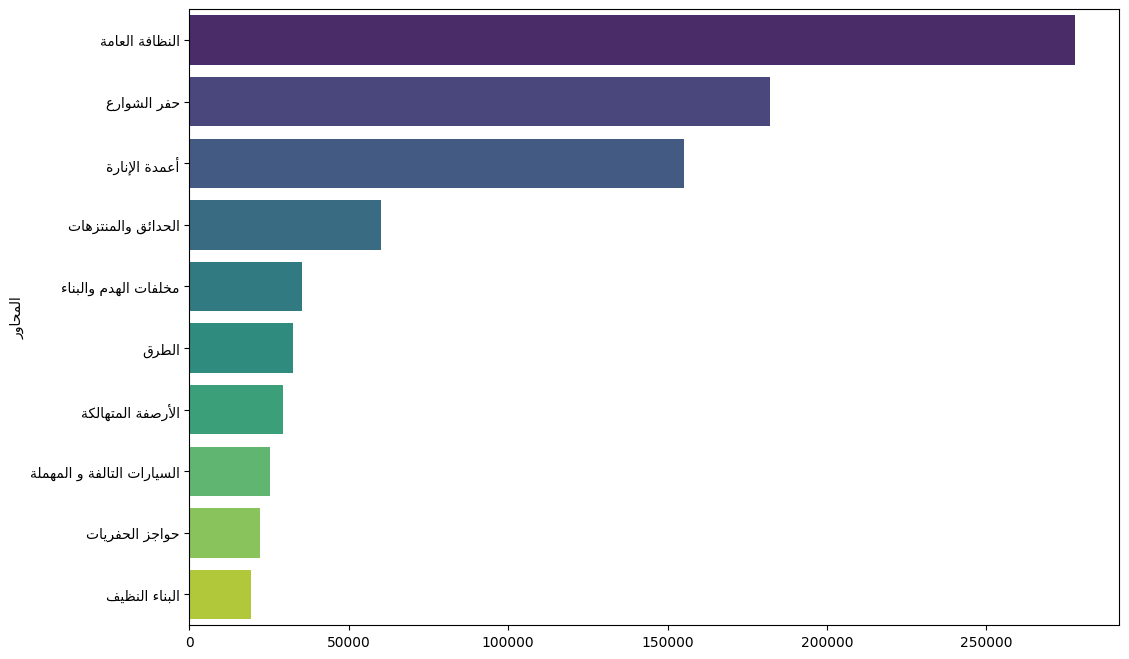

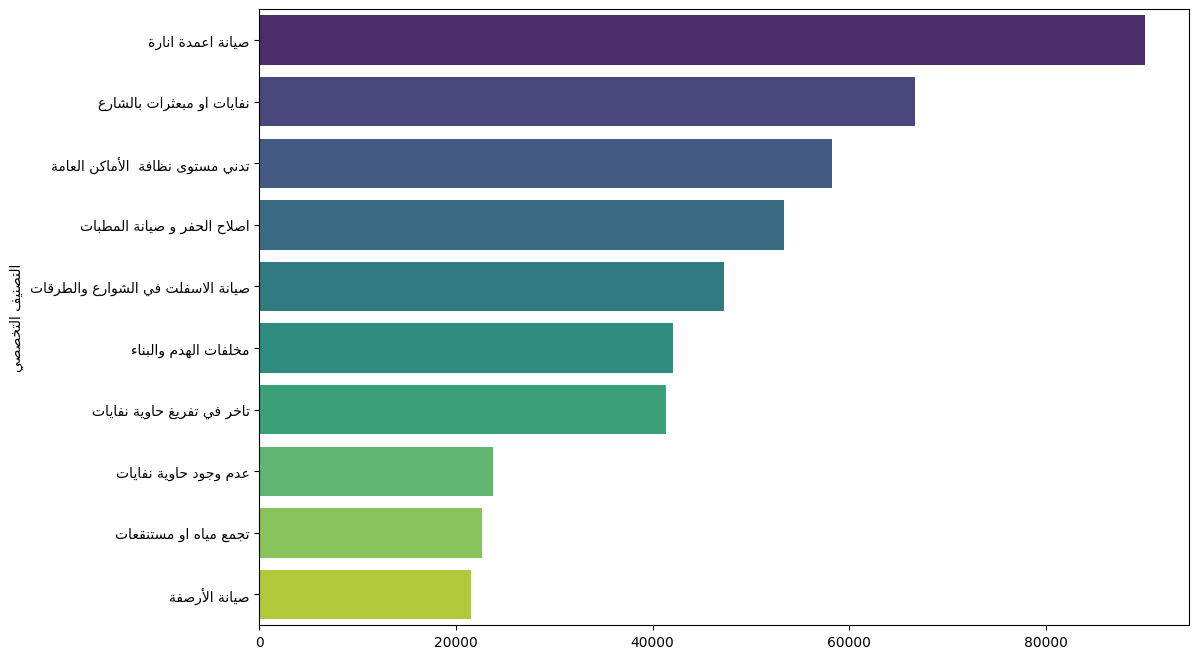

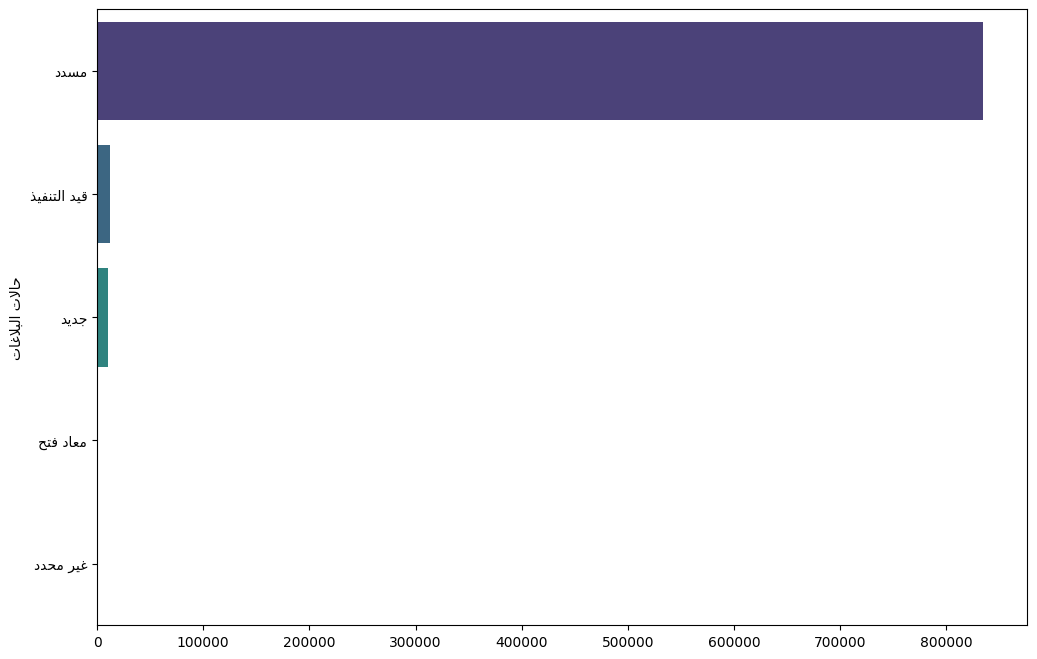

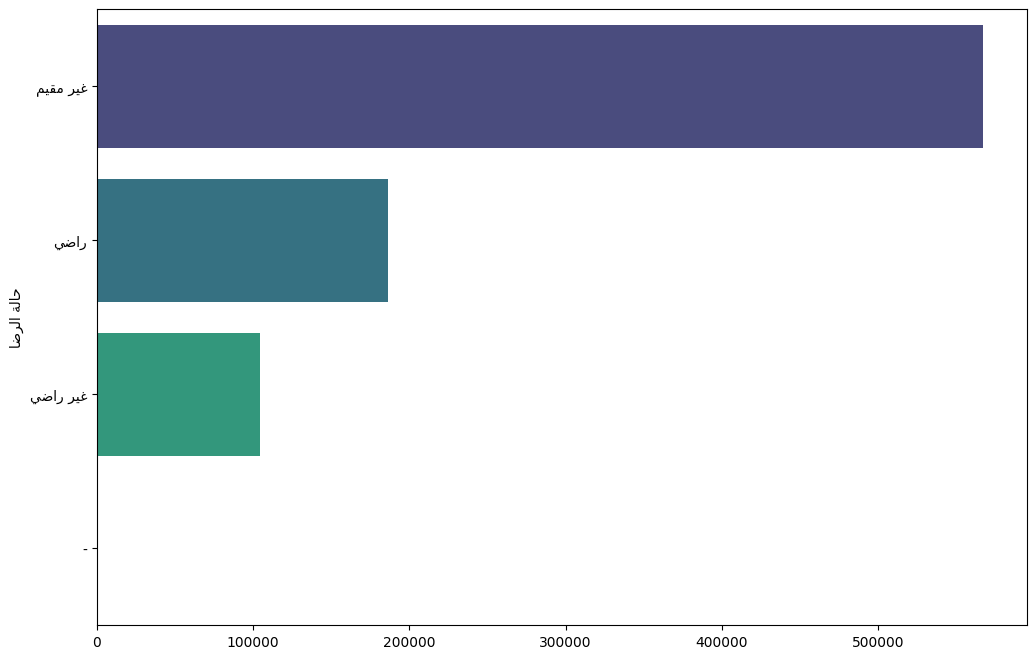

In [36]:
def plot_categorical_freq(col: str) -> None:

    # Frequency of each value
    counts = df[col].value_counts(sort=True).head(10)
    counts.index = counts.index.map(lambda x: get_display(arabic_reshaper.reshape(x)))

    # Create a bar plot and add label
    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.ylabel(get_display(arabic_reshaper.reshape(col)))

    # Show and close the plot
    plt.show()
    plt.close()

columns = ['المحاور', 'التصنيف التخصصي', 'حالات البلاغات', 'حالة الرضا']
for col_name in columns:
    plot_categorical_freq(col_name)

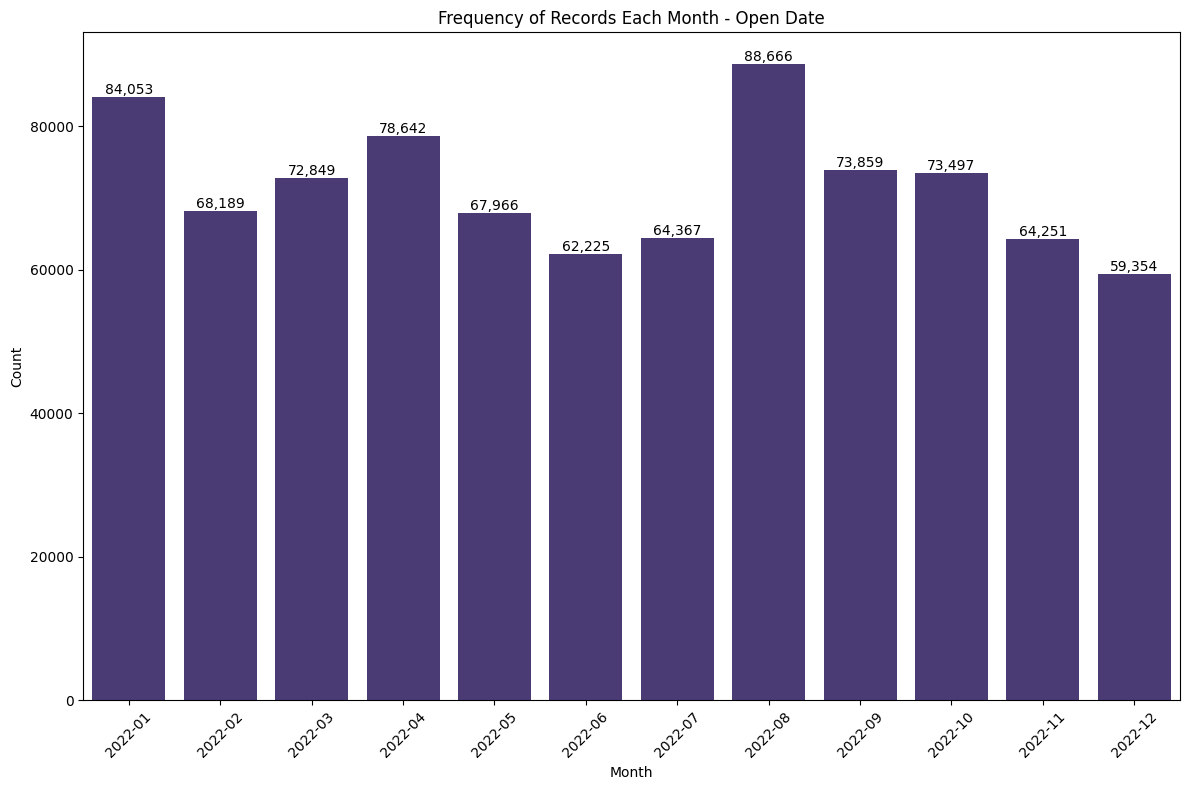

In [37]:
date_col = 'تاريخ الإنشاء'

monthly_counts = df[date_col].dt.to_period('M').value_counts()
monthly_counts = monthly_counts.sort_index().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.barplot(monthly_counts, x='index', y=date_col)
ax.bar_label(ax.containers[0], fontsize=10, fmt='{:,.0f}');

plt.title('Frequency of Records Each Month - Open Date')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

In [38]:
# Mask for closed tickets only
is_closed = (df['حالات البلاغات'] == 'مسدد')
df_closed = df[is_closed].copy()

# High level view of ratings (counts)
display(df_closed['حالة الرضا'].value_counts(dropna=False))
print('-' * 35)
# High level view of ratings (percentage)
display(df_closed['حالة الرضا'].value_counts(normalize=True, dropna=False))


غير مقيم    544942
راضي        186557
غير راضي    102665
Name: حالة الرضا, dtype: int64

-----------------------------------


غير مقيم    0.653279
راضي        0.223645
غير راضي    0.123075
Name: حالة الرضا, dtype: float64

In [39]:
df_closed['is_rated'] = (df_closed['حالة الرضا'].isin(['راضي', 'غير راضي']))
df_closed.groupby('البلدية')['is_rated'].mean()

البلدية
أبانات رشيد     0.348870
أبو راكة        0.527950
أبو عجرم        0.550218
أحد المسارحة    0.330688
أحد رفيدة       0.319969
                  ...   
وادي جيزان      0.447152
يبرين           0.261062
يدمه            0.309192
ينبع            0.317293
ينبع النخل      0.350243
Name: is_rated, Length: 331, dtype: float64

In [40]:
df['month'] = df['تاريخ الإنشاء'].dt.month
df['الموسم'] = df['month'].apply(lambda x: 'الشتاء' if x in [12, 1, 2] else
                                  'الربيع' if x in [3, 4, 5] else
                                  'الصيف' if x in [6, 7, 8] else
                                  'الخريف')


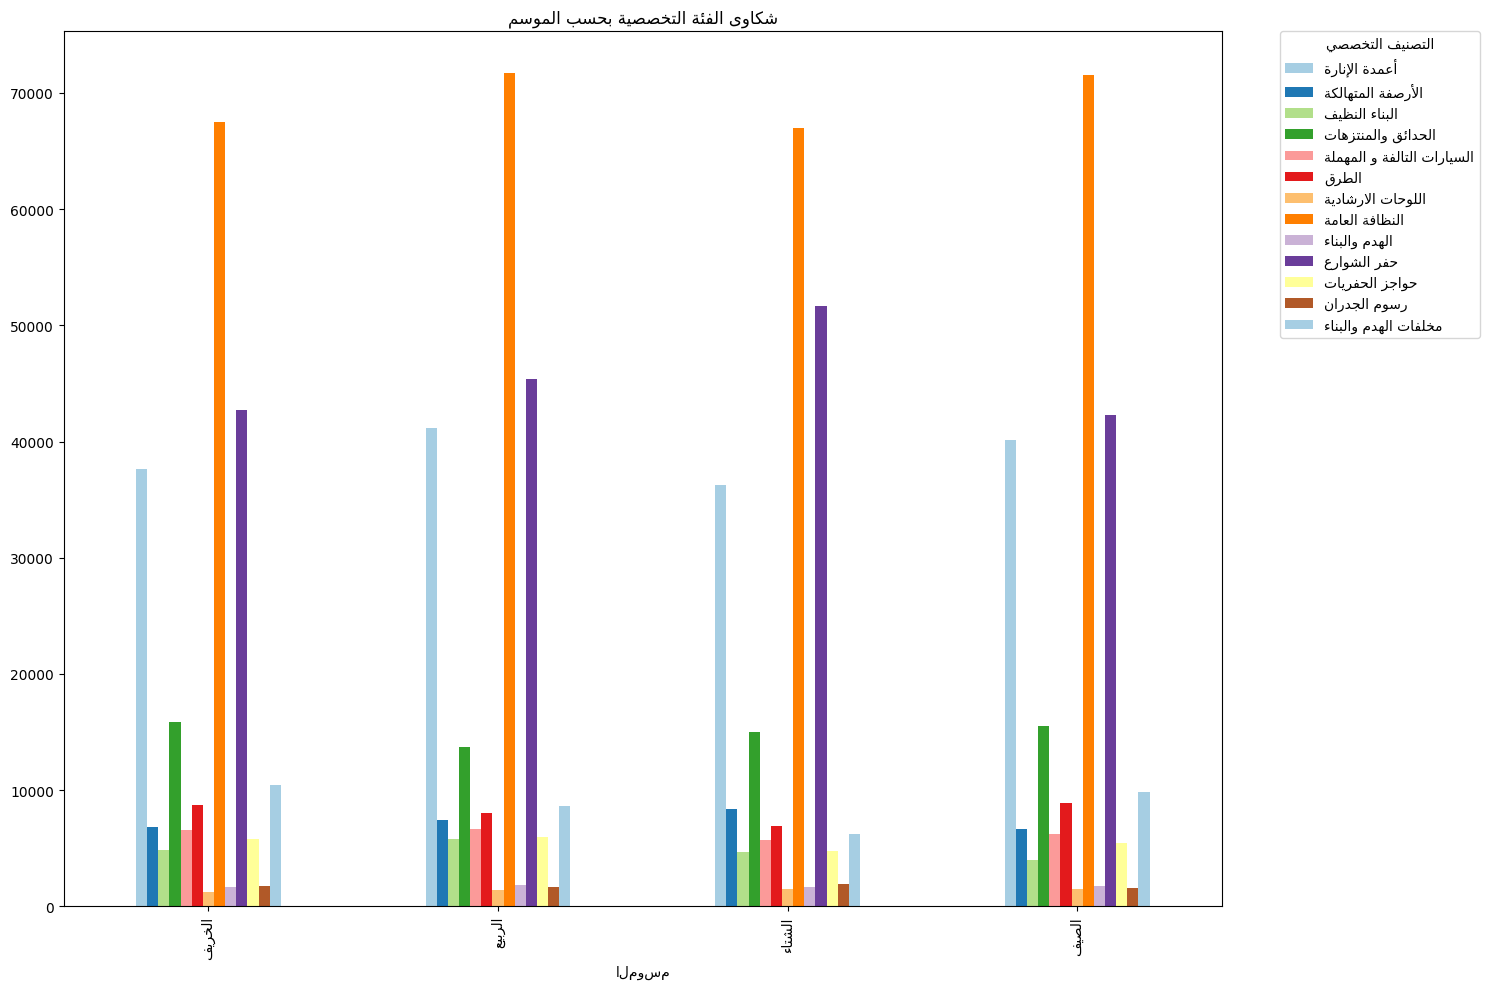

In [41]:
sns.set_palette('Paired')
df.groupby('الموسم')['المحاور'].value_counts().unstack().plot(kind='bar', figsize=(15, 10), label='Months')
plt.title(get_display(arabic_reshaper.reshape('شكاوى الفئة التخصصية بحسب الموسم')))
# y-axis tick labels
plt.gca().set_yticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in plt.gca().get_yticklabels()])

# x-axis tick labels
plt.gca().set_xticklabels([get_display(arabic_reshaper.reshape(label.get_text())) for label in plt.gca().get_xticklabels()])

# legend
handles, labels = plt.gca().get_legend_handles_labels()
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in labels]
legend = plt.gca().legend(handles, reshaped_labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=get_display(arabic_reshaper.reshape('التصنيف التخصصي')))
plt.tight_layout()
plt.show()
